In [1]:
import shutil
import os

import requests
import itk
import numpy as np

from itkwidgets import view

In [2]:
fiji_path='/home/bnorthan/fiji/Fiji.app'
import imagej
ij = imagej.init(fiji_path)

Added 362 JARs to the Java classpath.


In [3]:
import imglyb

In [4]:
# Download data
fileName = 'General_EduRes_Heart_BloodVessels_0.jpg'
if not os.path.exists(fileName):
    response = requests.get('https://data.kitware.com/api/v1/file/5afe74408d777f15ebe1d701/download', stream=True)
    with open(fileName, 'wb') as fp:
        response.raw.decode_content = True
        shutil.copyfileobj(response.raw, fp)

In [6]:
%matplotlib inline
image = itk.imread(fileName, pixelType=itk.ctype('float'))
view(image)

Viewer(image=<itkImagePython.itkImageF2; proxy of <Swig Object of type 'itkImageF2 *' at 0x7f9fd24040c0> >)

In [7]:
type(image)

itkImagePython.itkImageF2

In [8]:
image_arr = itk.GetArrayViewFromImage(image)
image_imglyb = imglyb.to_imglib(image_arr)

In [9]:
# Invoke the Frangi vesselness op.
vessels = np.zeros(image_arr.shape, dtype=np.float32)
ij.op().filter().frangiVesselness(imglyb.to_imglib(vessels), image_imglyb, [1, 1], 20)

<net.imglib2.RandomAccessibleInterval at 0x7f1a3e33fe60 jclass=net/imglib2/RandomAccessibleInterval jself=<LocalRef obj=0x55fb67a66770 at 0x7f1a858a8930>>

In [10]:
view(vessels)

Viewer(image=<itkImagePython.itkImageF2; proxy of <Swig Object of type 'itkImageF2 *' at 0x7f1a3e8142a0> >)

In [12]:
%matplotlib inline

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/bnorthan/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/bnorthan/anaconda3/lib/python3.6/threading.py", line 1182, in run
    self.function(*self.args, **self.kwargs)
  File "/home/bnorthan/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py", line 279, in <lambda>
    'Matplotlib is building the font cache using fc-list. '
  File "/home/bnorthan/anaconda3/lib/python3.6/warnings.py", line 101, in _showwarnmsg
    _showwarnmsg_impl(msg)
  File "/home/bnorthan/anaconda3/lib/python3.6/warnings.py", line 28, in _showwarnmsg_impl
    text = _formatwarnmsg(msg)
  File "/home/bnorthan/anaconda3/lib/python3.6/warnings.py", line 116, in _formatwarnmsg
    msg.filename, msg.lineno, line=msg.line)
TypeError: itkFormatWarning() got an unexpected keyword argument 'line'



In [13]:
view(image)

Viewer(image=<itkImagePython.itkImageF2; proxy of <Swig Object of type 'itkImageF2 *' at 0x7f1a3e93f450> >)

In [14]:
image

<itkImagePython.itkImageF2; proxy of <Swig Object of type 'itkImageF2 *' at 0x7f1a3e93f450> >

In [15]:
vessels

array([[  2.06236436e-05,   1.58827606e-06,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.03619207e-06,   1.44867613e-06,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.89109801e-06,   0.00000000e+00,   0.00000000e+00, ...,
          3.03749692e-09,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  2.75966059e-08,   2.40812916e-08,   2.10094289e-08, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  5.09529929e-09,   5.94969007e-09,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  8.66028529e-08,   6.88127528e-08,   1.05440662e-07, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32)

Populating the interactive namespace from numpy and matplotlib


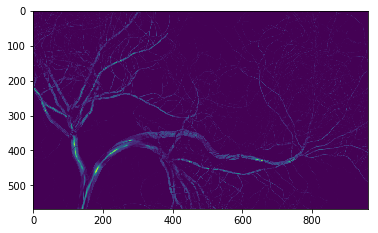

In [16]:
%pylab inline
import matplotlib.pyplot as plt
imgplot = plt.imshow(vessels)
plt.show()